In [1]:
%matplotlib inline
import yfinance as yf
import requests
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup

In [2]:
import wget
import bs4

In [3]:
import os

##### Получим данные о том, как торгуется нефть на американском рынке
(будем считать, что единицы измерения - тонны)

In [4]:
HOST='https://finance.yahoo.com/'
URL='https://finance.yahoo.com/quote/CL%3DF/history?p=CL%3DF'
HEADERS={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9','user-agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.119 YaBrowser/22.3.0.2434 Yowser/2.5 Safari/537.36'}

In [5]:
html=requests.get(URL,headers=HEADERS)

In [6]:
soup=BeautifulSoup(html.text,'html.parser')
items=soup.find_all('tr',class_='BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)') # _198Sj margin-hor-default

In [7]:
mixed_list=[]
list_of_lists=[]

for item in items:
    for i in range(len(item.find_all('td'))):
        mixed_list.append(item.find_all('td')[i].find('span').text)

In [8]:
for i in range(len(mixed_list)//7):
    list_of_lists.append(mixed_list[i*7:(i+1)*7])

In [9]:
Oil_prices=pd.DataFrame(list_of_lists,columns=['Date','Open','High','Low','Close','Adj_Close','Volume'])

In [10]:
Oil_prices.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,"Apr 20, 2022",103.05,104.16,100.70,102.68,102.68,"6,301"
1,"Apr 19, 2022",107.75,108.92,102.10,102.56,102.56,"68,489"
2,"Apr 18, 2022",107.03,109.81,106.00,108.21,108.21,"68,489"
3,"Apr 14, 2022",104.20,107.64,102.12,106.95,106.95,"244,952"
4,"Apr 13, 2022",100.91,104.47,99.87,104.25,104.25,"312,502"


In [11]:
def yhooDatesConvert(yhooDate):
    month_dic={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    year=int(yhooDate.split(', ')[1])
    month=month_dic[yhooDate.split(', ')[0].split(' ')[0]]
    day=int(yhooDate.split(', ')[0].split(' ')[1])
    return datetime.date(year, month, day)

In [12]:
Oil_prices.Date=Oil_prices.Date.apply(yhooDatesConvert)
for col in Oil_prices.columns[1:6]:
    Oil_prices[col]=Oil_prices[col].astype('float')
Oil_prices.Volume=Oil_prices.Volume.apply(lambda v: int(v.replace(',','')))

In [13]:
Oil_prices.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2022-04-20,103.05,104.16,100.70,102.68,102.68,6301
1,2022-04-19,107.75,108.92,102.10,102.56,102.56,68489
2,2022-04-18,107.03,109.81,106.00,108.21,108.21,68489
3,2022-04-14,104.20,107.64,102.12,106.95,106.95,244952
4,2022-04-13,100.91,104.47,99.87,104.25,104.25,312502
5,2022-04-12,95.17,101.35,94.84,100.60,100.60,329037
6,2022-04-11,98.40,98.52,92.93,94.29,94.29,315873
7,2022-04-08,97.17,98.76,95.29,98.26,98.26,310082
8,2022-04-07,97.16,98.82,93.81,96.03,96.03,367318
9,2022-04-06,101.24,104.02,95.73,96.23,96.23,366036


##### Получим данные о курсе доллара в ЦБ РФ

In [14]:
url_dollar = "http://cbr.ru/Queries/UniDbQuery/DownloadExcel/98956?Posted=True&so=1&mode=1&VAL_NM_RQ=R01235&From=01.03.2010&To=12.04.2022&FromDate=03%2F01%2F2010&ToDate=04%2F12%2F2022"

In [15]:
curs_dollar = pd.read_excel(wget.download(url_dollar))

100% [..............................................................................] 75254 / 75254

In [16]:
curs_dollar.head()

,nominal,data,curs,cdx
0,1,2022-04-12,79.1596,Доллар США
1,1,2022-04-09,74.8501,Доллар США
2,1,2022-04-08,76.2547,Доллар США
3,1,2022-04-07,82.5962,Доллар США
4,1,2022-04-06,83.3520,Доллар США


In [17]:
min_date=curs_dollar.data.min()
max_date=curs_dollar.data.max()
print('Начало: \t{0}\nКонец: \t\t{1}'.format(min_date.strftime('%Y-%m-%d'),max_date.strftime('%Y-%m-%d')))

Начало: 	2010-03-02
Конец: 		2022-04-12


##### Получим данные о курсе евров ЦБ Р

In [18]:
url_euro='http://cbr.ru/Queries/UniDbQuery/DownloadExcel/98956?Posted=True&so=1&mode=1&VAL_NM_RQ=R01239&From=02.03.2010&To=12.04.2022&FromDate=03%2F02%2F2010&ToDate=04%2F12%2F2022'

In [19]:
curs_euro = pd.read_excel(wget.download(url_euro))

100% [..............................................................................] 75321 / 75321

In [20]:
curs_euro.head()

,nominal,data,curs,cdx
0,1,2022-04-12,85.9752,Евро
1,1,2022-04-09,81.7064,Евро
2,1,2022-04-08,83.2930,Евро
3,1,2022-04-07,90.5998,Евро
4,1,2022-04-06,91.7289,Евро


In [21]:
min_date=curs_euro.data.min()
max_date=curs_euro.data.max()
print('Начало: \t{0}\nКонец: \t\t{1}'.format(min_date.strftime('%Y-%m-%d'),max_date.strftime('%Y-%m-%d')))

Начало: 	2010-03-02
Конец: 		2022-04-12


# Задание 1.

Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

### Дополнительные вводные:

Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [22]:


# Затраты на производство (постоянные затраты в день)
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%

# Дополнительные параметры

DAY_PRODUCT_VOLUME=500 # дневная выработка продукта (в тоннах)

WEEKEND_PRODUCT_VOLUME_DECREASE_RATE=0.6

NEEDED_OIL_PER_1000_KG=16

MARGIN=0.275

### Что нужно сделать?

##### 1. Проанализировать имеющиеся данные.

Допущения и драйверы:
1. Компания, производящая ВБП, является российской (валюта - рубли).
2. Нефть преобретается у нефтедобывающих компаний в долларах.
3. Стоимость нефти на дату сделки определяется по катировкам на американской бирже (по цене закрытия).
4. В стоимость нефти входят расходы на ее транспортировку до хранилищ нефтехимической компании.
5. Мощности нефтехимической компании обеспечивают дневную выработку ВБП в объеме 500 тонн.
6. Постоянные издержки составляют 400 евро в день.
7. Выработка в выходные дни сокращается на 60%.
8. Все транзакции проводятся одним днем.
9. Объема хранилищ нефтехимической компании достаточно для бесперебойного производства (покупаем нефть под нужды производства сегодня, но расходуем на сегодняшнее производство нефть уже находящуюся в хранилищах, а оплаченная сегодня нефть поступает в течение установленных сроков от поставщика в хранилища).
10. Валютный рынок - из "Зазеркалья": цена покупки и продажи валюты одинакова!

###### 2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.

Для расчета дневной цены используются следующие формулы:

для рабочего дня
$$priceCalc=\frac{(V_d*V_{ton}*P+C)*(1+M)}{V_d}$$
для выходного дня
$$priceCalc=\frac{((1-D)*V_d*V_{ton}*P+C)*(1+M)}{(1-D)*V_d}$$

где<br>
$V_d$ - (дневной) объем выработки<br>
$V_{ton}$ - объем нефти, необходимый для производства одной тонны ВБП<br>
$P$ - цена нефти в долларах<br>
$C$ - постоянные (дневные) затраты на производство одной тонны ВБП<br>
$M$ - маржа<br>
$D$ - степень снижения выработки в выходные

In [23]:
# Функция расчета цены
def priceCalc(oilPrices,strDt='2022-01-01'):
    d=datetime.datetime.strptime(strDt,'%Y-%m-%d').date()
    
    day_oil_price=float(oilPrices[oilPrices.Date==d].Close.max())
    day_dollar_production_cost=PRODUCTION_COST*curs_dollar[curs_dollar.data==d].curs.max()/curs_euro[curs_euro.data==d].curs.max()
    
    
    if datetime.datetime.weekday(d) in [0,1,2,3,4]:
        priceCalc = (DAY_PRODUCT_VOLUME*NEEDED_OIL_PER_1000_KG*day_oil_price+day_dollar_production_cost)*(1+MARGIN)/DAY_PRODUCT_VOLUME
    else:
        priceCalc=((1-WEEKEND_PRODUCT_VOLUME_DECREASE_RATE)*DAY_PRODUCT_VOLUME*NEEDED_OIL_PER_1000_KG*day_oil_price+day_dollar_production_cost)*(1+MARGIN)/((1-WEEKEND_PRODUCT_VOLUME_DECREASE_RATE)*DAY_PRODUCT_VOLUME)
    
    return {'USD':round(priceCalc,2),'EUR':round(priceCalc/(curs_dollar[curs_dollar.data==d].curs.max()/curs_euro[curs_euro.data==d].curs.max()),2)}

###### 3. Отобразить на графике (базовую цену).

In [24]:
# Сформируем список дат с 12.03.2022 по 12.04.2022
last_month_dates=[]
for i in range(12,32):
    last_month_dates.append(datetime.date(2022,3,i))
for i in range(1,13):
    last_month_dates.append(datetime.date(2022,4,i))

In [25]:
pricesInUSD=[]
pricesInEUR=[]
for d in last_month_dates:
    prices=priceCalc(Oil_prices,datetime.datetime.strftime(d,'%Y-%m-%d'))
    pricesInUSD.append(prices['USD'])
    pricesInEUR.append(prices['EUR'])

samplePricesLastMonth=pd.DataFrame({'Date':last_month_dates,'PriceUSD':pricesInUSD,'PriceEUR':pricesInEUR})

C:\Users\iraid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
C:\Users\iraid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [26]:
samplePricesLastMonth.head(10)

,Date,PriceUSD,PriceEUR
0,2022-03-12,NaN,NaN
1,2022-03-13,NaN,NaN
2,2022-03-14,NaN,NaN
3,2022-03-15,1968.30,2173.99
4,2022-03-16,1939.74,2130.62
5,2022-03-17,2101.72,2310.00
6,2022-03-18,2136.80,2363.73
7,2022-03-19,NaN,NaN
8,2022-03-20,NaN,NaN
9,2022-03-21,NaN,NaN


In [27]:
# заменим отсутствующие значения последующими
samplePricesLastMonth=samplePricesLastMonth.fillna(method='bfill')

In [28]:
samplePricesLastMonth.head(10)

,Date,PriceUSD,PriceEUR
0,2022-03-12,1968.30,2173.99
1,2022-03-13,1968.30,2173.99
2,2022-03-14,1968.30,2173.99
3,2022-03-15,1968.30,2173.99
4,2022-03-16,1939.74,2130.62
5,2022-03-17,2101.72,2310.00
6,2022-03-18,2136.80,2363.73
7,2022-03-19,2280.83,2518.72
8,2022-03-20,2280.83,2518.72
9,2022-03-21,2280.83,2518.72


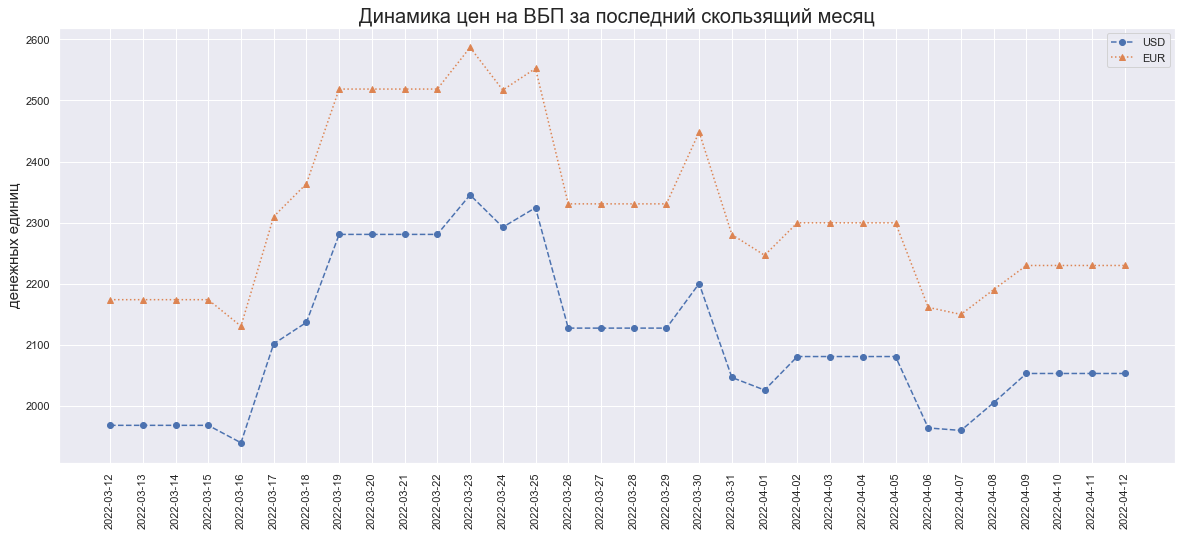

In [29]:
plt.figure(figsize=(20,8))
plt.plot(samplePricesLastMonth.PriceUSD,label='USD',linestyle='dashed', marker='o')
plt.plot(samplePricesLastMonth.PriceEUR,label='EUR',linestyle='dotted', marker='^');
plt.xticks(range(len(samplePricesLastMonth.Date)),samplePricesLastMonth.Date,rotation=90)
plt.title('Динамика цен на ВБП за последний скользящий месяц',size=20)
plt.legend()
plt.ylabel('денежных единиц',size=15);

##### 4. Сделать расчет возможной цены (стоимости с учетом региона и скидки) по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.

In [30]:
# функция, формирующая "прайслист" за последний (скользящий) месяц
def CustomersPriceList(dayli_prices,logistic_costs,customers,discounts):
    #CustomersPriceList=np.nan
    
    CustomersPriceList=pd.DataFrame({'Date':[],'Customer':[],'Location':[],'Volume':[],'Price':[],'Base_costs':[],'Transport_costs':[],'Total_costs':[]})
    
    for customer in customers.keys():
        wDF=dayli_prices.copy()
        wDF['Customer']=customer
        wDF['Location']=customers[customer]['location']
        wDF['Volume']=customers[customer]['volumes']
        if customers[customer]['location'] == 'EU':
            wDF['Base_costs']=wDF['Volume']*dayli_prices['PriceEUR']
            wDF['Transport_costs']=logistic_costs['EU']*wDF['Volume']
            wDF.drop(['PriceUSD'],axis=1,inplace=True)
            wDF.rename(columns={'PriceEUR':'Price'},inplace=True)
        elif customers[customer]['location'] == 'CN':
            wDF['Base_costs']=wDF['Volume']*dayli_prices['PriceUSD']
            wDF['Transport_costs']=logistic_costs['CN']*wDF['Volume']
            wDF.drop(['PriceEUR'],axis=1,inplace=True)
            wDF.rename(columns={'PriceUSD':'Price'},inplace=True)
        wDF['Total_costs']=wDF['Base_costs']+wDF['Transport_costs']
        
        if customers[customer]['volumes']>300:
            wDF['Discount']=discounts['300 plus']
        elif customers[customer]['volumes']>100:
            wDF['Discount']=discounts['up to 300']
        else:
            wDF['Discount']=discounts['up to 100']
            
        wDF['Total_costs']=wDF['Total_costs']*wDF['Discount']
        
        #wDF=wDF[['Date','Customer','Location','Volume','Price','Base_costs','Transport_costs','Discount','Total_costs']]
        
        CustomersPriceList=pd.concat([CustomersPriceList,wDF],axis=0,sort=False)
    
        CustomersPriceList=CustomersPriceList[['Date','Customer','Location','Volume','Price','Base_costs','Transport_costs','Discount','Total_costs']]
    
    
    return CustomersPriceList

In [31]:
DFtoExcel=CustomersPriceList(samplePricesLastMonth,{'EU':EU_LOGISTIC_COST_EUR,'CN':CN_LOGISTIC_COST_USD},customers,discounts)

In [32]:
DFtoExcel.head()

,Date,Customer,Location,Volume,Price,Base_costs,Transport_costs,Discount,Total_costs
0,2022-03-12,Monty,EU,200.0,2173.99,434798.0,6000.0,0.05,22039.9
1,2022-03-13,Monty,EU,200.0,2173.99,434798.0,6000.0,0.05,22039.9
2,2022-03-14,Monty,EU,200.0,2173.99,434798.0,6000.0,0.05,22039.9
3,2022-03-15,Monty,EU,200.0,2173.99,434798.0,6000.0,0.05,22039.9
4,2022-03-16,Monty,EU,200.0,2130.62,426124.0,6000.0,0.05,21606.2


In [33]:
with pd.ExcelWriter('ActualPriceListsMWP.xlsx') as writer:  
    for c in DFtoExcel['Customer'].unique():
            DFtoExcel[DFtoExcel['Customer']==c].to_excel(writer, sheet_name=c)

##### 5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
##### - Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
###### - Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента…

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [636]:
# 

# Задание 2. 

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [637]:
# 

# Задание 3. 
К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [638]:
# 

# Задание 4. 

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [639]:
# 

# Задание 5.

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [640]:
# import yourpackage

# Задание 6. 

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [641]:
# !pip install yourpackage
# import yourpackage